<a href="https://colab.research.google.com/github/alina-nnnn/Math-programming/blob/main/PCA_SVD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<a href="https://colab.research.google.com/github/yandexdataschool/MLatImperial2020/blob/master/03_lab/PCA-SVD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import scipy as sp
import numpy as np
import scipy.linalg as sla
import scipy.sparse as sps
import scipy.sparse.linalg as spla

import matplotlib.pyplot as plt
%pylab inline

import pandas as pd

Populating the interactive namespace from numpy and matplotlib


# PCA - Метод главных компонент

У нас есть объект - матрица признаков $F$ размером l x n,

Для PCA основная задача состоит в том, чтобы найти такую ​​весовую матрицу $W$ такую, что

$$
G = FW, т.ч. \ \  \ ||GW^T - F||^2 -> min
$$

где $G$ - матрица главных компонентов $F$ размером l x m, $W$  транспонированная матрица размера n x m от старых функций к новым.

Столбцы матрицы $W$ представляют главную ось в пространстве признаков.



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
random_state = 0

# Загрузить набор данных Digits
X, y = datasets.load_digits(return_X_y=True)

# Разделим на train/test
X_train, X_test, y_train, y_test = \
    train_test_split(X, y, test_size=0.5, stratify=y,
                     random_state=random_state)


Здесь мы будем изучать что-то вроде набора данных mnist — изображения чисел от 0 до 9, каждое из которых имеет размер 8x8 пикселей.

In [ ]:
X.shape, y.shape

((1797, 64), (1797,))

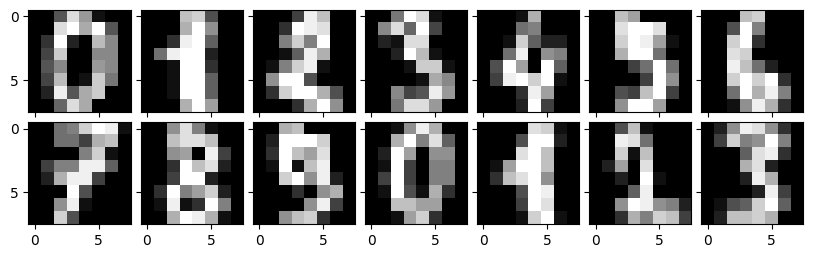

In [ ]:
from mpl_toolkits.axes_grid1 import ImageGrid
fig = plt.figure(1,(10,10))
grid = ImageGrid(fig, 111,
                 nrows_ncols=(2,7),
                 axes_pad=0.1,
                 )
for i in range(14):
    image = X[i,:].squeeze().reshape(8,8)
    grid[i].imshow(image,cmap='gray',interpolation='none')

Мы можем объединить всю предварительную обработку данных и алгоритм, который мы хотим использовать, с помощью инструмента sklearn make_pipeline. Это очень удобно, когда вы хотите написать более удобный для сопровождения код, и его будет легко проверить на наличие ошибок и внести изменения.

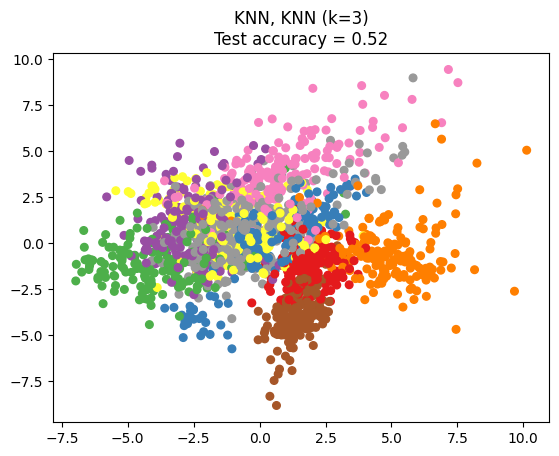

In [ ]:
dim = len(X[0])
n_classes = len(np.unique(y))

n_neighbors = 3
n_components = 2

# Уменьшите размерность до 2 с помощью PCA


knn_pca = make_pipeline(StandardScaler(),
                    PCA(n_components=n_components, random_state=1543),
                    KNeighborsClassifier(n_neighbors=n_neighbors))

# Постройте модель метода
knn_pca.fit(X_train, y_train)

acc_knn = knn_pca.score(X_test, y_test)

# Вставьте набор данных в 2 измерения, используя подогнанную модель
X_transformed = knn_pca[:-1].transform(X)

# Постройте прогнозируемые баллы и покажите оценочный балл
plt.figure()
plt.scatter(X_transformed[:, 0], X_transformed[:, 1], c=y, s=30, cmap='Set1')
plt.title("{}, KNN (k={})\nTest accuracy = {:.2f}".format("KNN",
                                                          n_neighbors,
                                                          acc_knn))
plt.show()

In [ ]:
from sklearn.pipeline import Pipeline

In [ ]:
def calculate_score(n_neighbors, n_components):
    ### В этой функции реализуйте установку конвейера
    ### с заданным номером или соседями и компонентами PCA
    ### в тренировочных данных
    ### и оценивая его на тестовых данных.

    pipeline = Pipeline([
        ('pca', PCA(n_components=n_components)),
        ('knn', KNeighborsClassifier(n_neighbors=n_neighbors))
    ])

    pipeline.fit(X_train, y_train)

    score = pipeline.score(X_test, y_test)

    return score

построить зависимость оценки от n_neigbours и n_components

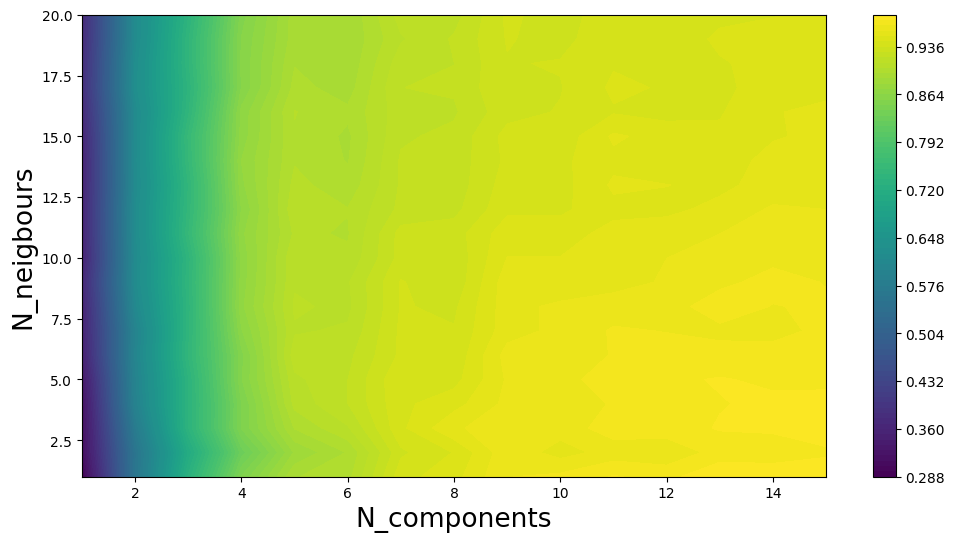

In [ ]:
results = []

neighbors = range(1, 21)
components = range(1, 16)

for n_n in neighbors:
    for n_c in components:
        results.append(calculate_score(n_n, n_c))

x_pos, y_pos = np.meshgrid(components, neighbors)
plt.figure(figsize=(12,6))
plt.contourf(x_pos, y_pos, np.array(results).reshape(x_pos.shape), levels=100);
plt.colorbar()
plt.xlabel("N_components",fontsize=19)
plt.ylabel("N_neigbours",fontsize=19);

### Давайте возьмем еще один набор данных о винах и посмотрим на эффект стандартизации данных.

In [ ]:
from __future__ import print_function
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.pipeline import make_pipeline
print(__doc__)

# Code source: Tyler Lanigan <tylerlanigan@gmail.com>
#              Sebastian Raschka <mail@sebastianraschka.com>

# License: BSD 3 clause

RANDOM_STATE = 42
FIG_SIZE = (10, 7)

features = pd.DataFrame(load_wine(return_X_y=False)['data'],
                        columns=load_wine(return_X_y=False)['feature_names'])

target = load_wine(return_X_y=False)['target']
features.head(5)

Automatically created module for IPython interactive environment


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [ ]:
# Сделайте train/test split используя 30% test size
X_train, X_test, y_train, y_test = train_test_split(features, target,
                                                    test_size=0.30,
                                                    random_state=RANDOM_STATE)

Хорошо, теперь, когда вы знаете, как сделать конвейер, сделайте конвейер со стандартным масштабатором и PCA и просто PCA.

In [ ]:
# Подгонка к данным и прогнозирование с использованием конвейерного PCA.
unscaled_clf = make_pipeline(PCA(n_components=2), KNeighborsClassifier())

unscaled_clf.fit(X_train, y_train)
pred_test = unscaled_clf.predict(X_test)

# Подгонка к данным и прогнозирование с использованием конвейерного масштабирования, PCA.
std_clf = make_pipeline(StandardScaler(), PCA(n_components=2), KNeighborsClassifier())

std_clf.fit(X_train, y_train)
pred_test_std = std_clf.predict(X_test)

# Извлечь PCA из пайплайна
pca = unscaled_clf.named_steps['pca']
pca_std = std_clf.named_steps['pca']


PC 1 without scaling:
 [ 1.76342917e-03 -8.35544737e-04  1.54623496e-04 -5.31136096e-03
  2.01663336e-02  1.02440667e-03  1.53155502e-03 -1.11663562e-04
  6.31071580e-04  2.32645551e-03  1.53606718e-04  7.43176482e-04
  9.99775716e-01]

PC 1 with scaling:
 [ 0.13443023 -0.25680248 -0.0113463  -0.23405337  0.15840049  0.39194918
  0.41607649 -0.27871336  0.33129255 -0.11383282  0.29726413  0.38054255
  0.27507157]


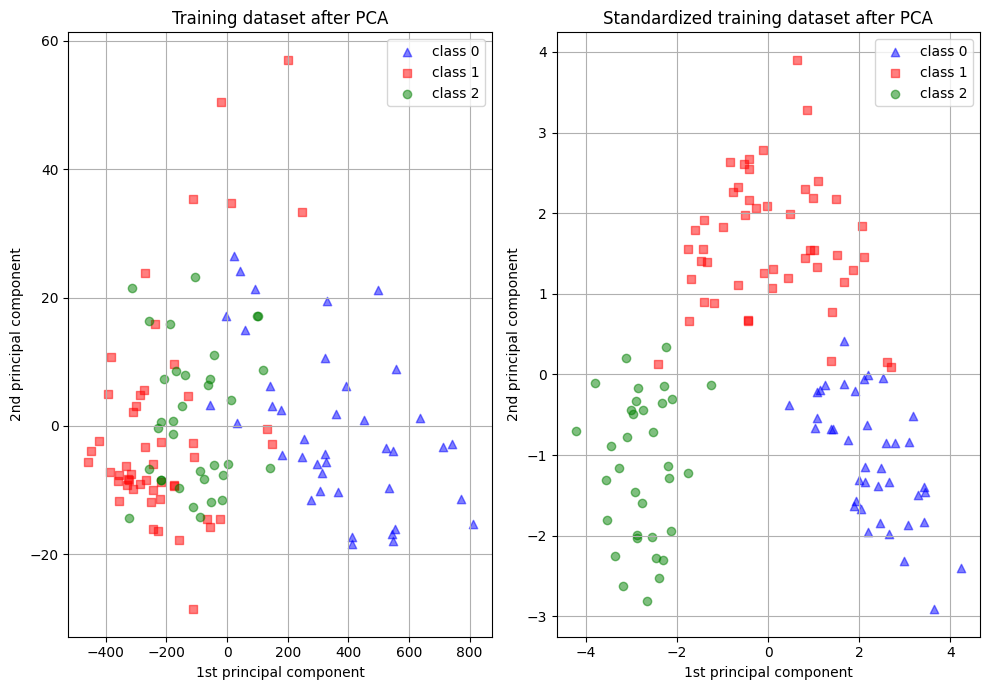

In [ ]:
# Показать первые главные компоненты
print('\nPC 1 without scaling:\n', pca.components_[0])
print('\nPC 1 with scaling:\n', pca_std.components_[0])

# Используйте PCA без масштаба и с масштабом данных X_train для визуализации.
X_train_transformed = pca.transform(X_train)
scaler = std_clf.named_steps['standardscaler']
X_train_std_transformed = pca_std.transform(scaler.transform(X_train))

# визуализировать стандартизированный и нетронутый набор данных с выполненным PCA
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=FIG_SIZE)


for l, c, m in zip(range(0, 3), ('blue', 'red', 'green'), ('^', 's', 'o')):
    ax1.scatter(X_train_transformed[y_train == l, 0],
                X_train_transformed[y_train == l, 1],
                color=c,
                label='class %s' % l,
                alpha=0.5,
                marker=m
                )

for l, c, m in zip(range(0, 3), ('blue', 'red', 'green'), ('^', 's', 'o')):
    ax2.scatter(X_train_std_transformed[y_train == l, 0],
                X_train_std_transformed[y_train == l, 1],
                color=c,
                label='class %s' % l,
                alpha=0.5,
                marker=m
                )

ax1.set_title('Training dataset after PCA')
ax2.set_title('Standardized training dataset after PCA')

for ax in (ax1, ax2):
    ax.set_xlabel('1st principal component')
    ax.set_ylabel('2nd principal component')
    ax.legend(loc='upper right')
    ax.grid()

plt.tight_layout()

plt.show()

In [ ]:
###  Постройте объясненный коэффициент дисперсии по сравнению с числовыми компонентами. Для этого используйте доступные методы класса PCA.

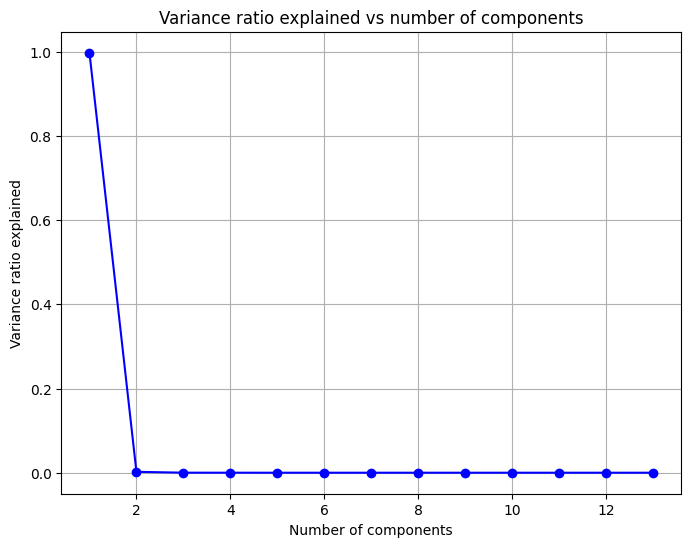

In [ ]:
pca = PCA().fit(X_train)

var_ratio = pca.explained_variance_ratio_

plt.figure(figsize=(8,6))
plt.plot(range(1, len(var_ratio)+1), var_ratio, 'bo-')
plt.xlabel('Number of components')
plt.ylabel('Variance ratio explained')
plt.title('Variance ratio explained vs number of components')
plt.grid()
plt.show()

# SVD decomposition - Сингулярное разложение

если M это m x n матрица над полем K, существует ее факторизация:

$$
M = U * S * V^{\dagger}, где
$$
- $U$ - это m x m унитарная матрица над K,
- $S$ - диагональная матрица m x n с неотрицательными вещественными числами,
- $V$ - это n x n унитарная матрица над K.

Значения $s_i$ матрицы S называются сингулярными значениями M.
Эта декомпозиция называется Singular Value Decomposition — SVD.

Столбцы $U$ и $V$ называются левыми и правыми сингулярными векторами $M$:
$$
M v = s u, \
M^{\dagger} u = sv
$$

Различные приложения в математике и оптимизации - псевдообратные вычисления, факторизация низкого ранга, применение при решении систем уравнений...

Если мы определим матрицу $M$ как $F$, и

$$
G = U * S,
$$

мы получим полную декомпозицию PCA, где матрица весов $W$ теперь равна $V$.

Итак, чтобы получить первые K главных компонент, мы просто возьмем первые K столбцов матрицы $S * U$.

#### Мы также можем просмотреть эти компоненты в исходном базисе M. Для этого умножим их на первые K строк матрицы $V~{dagger}$.


In [ ]:
!wget https://github.com/yandexdataschool/MLatImperial2020/raw/master/03_lab/swisscows_edit.jpg

--2023-05-22 09:37:34--  https://github.com/yandexdataschool/MLatImperial2020/raw/master/03_lab/swisscows_edit.jpg
Resolving github.com (github.com)... 140.82.113.3
Connecting to github.com (github.com)|140.82.113.3|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2023-05-22 09:37:35 ERROR 404: Not Found.



In [ ]:
pip install -U scikit-image

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from PIL import Image
from matplotlib.pyplot import imread
from skimage import io
from skimage.color import rgb2gray

img = color.rgb2gray(imread(r'swisscows_edit.jpg'))
img.shape

(600, 800)

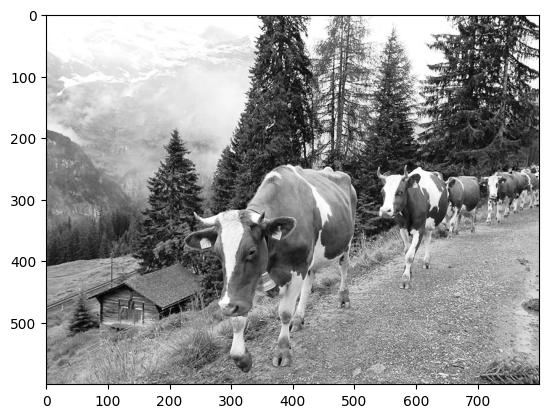

In [ ]:
imgplot = plt.imshow(img, cmap='Greys_r')

# PCA через SVD для сжатия

Мы будем использовать svd из пакета scipy

In [ ]:
U, s, V_h = sla.svd(img, full_matrices=False)
print(U.shape, s.shape, V_h.shape)

(600, 600) (600,) (600, 800)


In [ ]:
U, s, V_h = sla.svd(img, full_matrices=False)
pca_1 = (U[:,0]*s[0])[:,np.newaxis].dot(V_h[0,:][np.newaxis,:])
pca_1.shape

(600, 800)

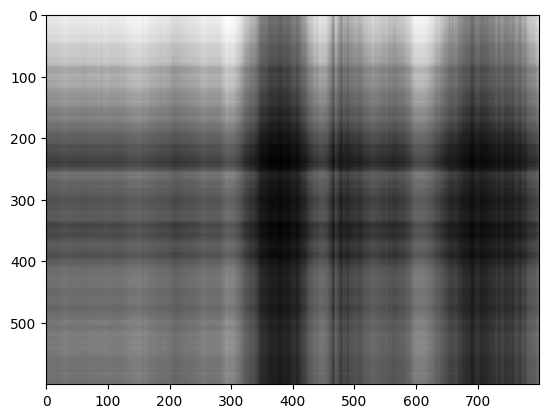

In [ ]:
plt.imshow(pca_1, cmap='Greys_r');

 #### Теперь напишите функцию, которая будет возвращать главные компоненты от I до J в исходном базисе (Подсказка: посмотрите, как мы вычислили первый компонент в исходном базисе)

In [ ]:
U, s, V_h = sla.svd(img, full_matrices=False)
def PCA(start_component = 0, end_component = 1, U = U, s = s, V_h = V_h):

    S = np.diag(s)
    U_s = U[:, start_component:end_component+1]
    V_s = V_h[start_component:end_component+1, :]


    US = np.dot(U_s, S[start_component:end_component+1, start_component:end_component+1])
    components = np.dot(US, V_s)


    return components

In [ ]:
pca_1 = PCA()
pca_1_20 = PCA(end_component=20)
pca_1_50 = PCA(end_component=50)
pca_20_100 = PCA(20, 100)
pca_20_end = PCA(20, 384)
#pca_full = PCA(0, 384)

Text(0.5, 1.0, '20-end PCA')

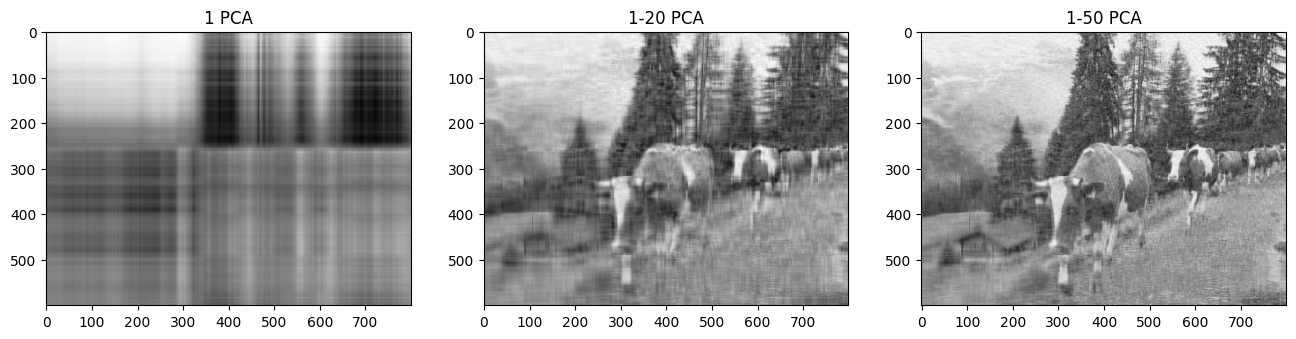

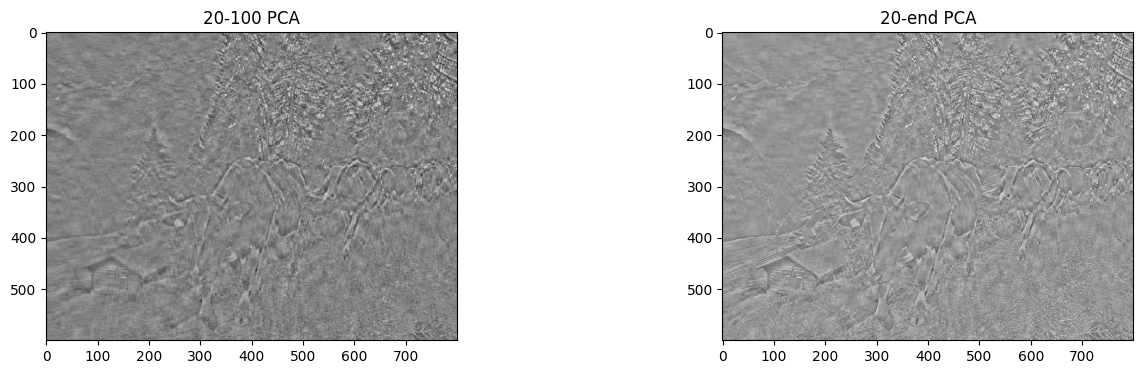

In [ ]:
plt.figure(figsize=(16, 4))
plt.subplot(1,3,1)
imgplot = plt.imshow(pca_1, cmap='Greys_r')
plt.title("1 PCA")

plt.subplot(1,3,2)
imgplot = plt.imshow(pca_1_20, cmap='Greys_r')
plt.title("1-20 PCA")

plt.subplot(1,3,3)
imgplot = plt.imshow(pca_1_50, cmap='Greys_r')
plt.title("1-50 PCA")

plt.figure(figsize=(16, 4))
plt.subplot(1,2,1)
imgplot = plt.imshow(pca_20_100, cmap='Greys_r')
plt.title("20-100 PCA")

plt.subplot(1,2,2)
imgplot = plt.imshow(pca_20_end, cmap='Greys_r')
plt.title("20-end PCA")

### Как вы думаете, что отражает 1-й компонент PCA? Как вы находите, дает ли вам 1-50 компонентов хорошее изображение?

In [ ]:
img.shape

(600, 800)

Первые компоненты отражают самое большое место, где один глобальный объект переходит в другой. В этом месте происходит самое большое изменение градиента.

Используя первые компоненты изображения, можно сжать его по размеру, т.е.

использование первых K компонентов даст прирост памяти

$$
\frac{N_{rows} * N_{cols}}{K * (N_{rows} + N_{cols} + 1)}
$$

Интересная и полезная ссылка

[Medium](https://medium.com/@jonathan_hui/machine-learning-singular-value-decomposition-svd-principal-component-analysis-pca-1d45e885e491)